### Distilling the Knowledge in a Neural Network

https://arxiv.org/pdf/1503.02531.pdf

In [129]:
from importlib import reload
import models
reload(models)
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import optimizers

In [2]:
batch_size = 1280
num_classes = 10
epochs = 60

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = dict()
hist = dict()
score = dict()
preds = dict()

In [20]:
reload(models)
model['teacher'] = models.TeacherModel(input_shape, num_classes)

model['teacher'].compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

W0802 09:25:39.304006 139704598443840 deprecation_wrapper.py:119] From /home/acar/.virtualenvs/dllab/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [21]:
hist['teacher'] = model['teacher'].fit(x_train, y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))
score['teacher'] = model['teacher'].evaluate(x_test, y_test, verbose=0)
print('Test loss:', score['teacher'][0])
print('Test accuracy:', score['teacher'][1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.6150 - acc: 0.8142 - val_loss: 0.1535 - val_acc: 0.9553
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1704 - acc: 0.9504 - val_loss: 0.0718 - val_acc: 0.9775
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1046 - acc: 0.9690 - val_loss: 0.0522 - val_acc: 0.9835
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0816 - acc: 0.9760 - val_loss: 0.0442 - val_acc: 0.9856
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0686 - acc: 0.9794 - val_loss: 0.0366 - val_acc: 0.9865
Epoch 6/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0578 - acc: 0.9826 - val_loss: 0.0360 - val_acc: 0.9879
Epoch 7/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.0521 - acc: 0.9843 - val_loss: 0.0341 - val_ac

In [53]:
score['teacher'] = model['teacher'].evaluate(x_test, y_test, verbose=0)
n_errors = np.int((1-score['teacher'][-1])*len(y_test))
print('Test loss:', score['teacher'][0])
print('Test accuracy:', score['teacher'][-1])
print('Test errors:', n_errors)

Test loss: 0.0262781987335713
Test accuracy: 0.9917
Test errors: 82


In [117]:
reload(models)
model['soft_teacher'] = models.SoftTeacherModel(input_shape, num_classes, l1=0.1, l2=0.05, b=1.7)

model['soft_teacher'].compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [118]:
hist['soft_teacher'] = model['soft_teacher'].fit(x_train, y_train,
          batch_size=batch_size,
          epochs=60,
          verbose=1,
          validation_data=(x_test, y_test))
score['soft_teacher'] = model['soft_teacher'].evaluate(x_test, y_test, verbose=0)
print('Test loss:', score['soft_teacher'][0])
print('Test accuracy:', score['soft_teacher'][1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 8s 133us/step - loss: 1.4975 - acc: 0.7563 - val_loss: 1.1672 - val_acc: 0.9550
Epoch 2/60
60000/60000 [==============================] - 3s 58us/step - loss: 1.2064 - acc: 0.9439 - val_loss: 1.1130 - val_acc: 0.9780
Epoch 3/60
60000/60000 [==============================] - 4s 64us/step - loss: 1.1680 - acc: 0.9638 - val_loss: 1.1015 - val_acc: 0.9809
Epoch 4/60
60000/60000 [==============================] - 5s 88us/step - loss: 1.1506 - acc: 0.9717 - val_loss: 1.0937 - val_acc: 0.9832
Epoch 5/60
60000/60000 [==============================] - 6s 95us/step - loss: 1.1388 - acc: 0.9766 - val_loss: 1.0897 - val_acc: 0.9843
Epoch 6/60
60000/60000 [==============================] - 6s 101us/step - loss: 1.1312 - acc: 0.9793 - val_loss: 1.0856 - val_acc: 0.9852
Epoch 7/60
60000/60000 [==============================] - 11s 183us/step - loss: 1.1239 - acc: 0.9823 - val_loss: 1.0835 - val

In [108]:
score['soft_teacher'] = model['soft_teacher'].evaluate(x_test, y_test, verbose=0)
n_errors = np.int((1-score['soft_teacher'][-1])*len(y_test))
print('Test loss:', score['soft_teacher'][0])
print('Test accuracy:', score['soft_teacher'][-1])
print('Test errors:', n_errors)

Test loss: 0.28867836813926695
Test accuracy: 0.992
Test errors: 80


In [51]:
reload(models)
model['student'] = models.StudentModel(input_shape, num_classes)

model['student'].compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

hist['student'] = model['student'].fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          validation_data=(x_test, y_test))
score['student'] = model['student'].evaluate(x_test, y_test, verbose=0)
print('Test loss:', score['student'][0])
print('Test accuracy:', score['student'][1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.4571 - acc: 0.8737 - val_loss: 0.1872 - val_acc: 0.9466
Epoch 2/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.1472 - acc: 0.9576 - val_loss: 0.1209 - val_acc: 0.9634
Epoch 3/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0965 - acc: 0.9720 - val_loss: 0.0907 - val_acc: 0.9715
Epoch 4/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0673 - acc: 0.9803 - val_loss: 0.0764 - val_acc: 0.9779
Epoch 5/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0475 - acc: 0.9861 - val_loss: 0.0729 - val_acc: 0.9775
Epoch 6/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0364 - acc: 0.9899 - val_loss: 0.0650 - val_acc: 0.9808
Epoch 7/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0270 - acc: 0.9927 - val_loss: 0.0631 - val_acc

In [49]:
score['student'] = model['student'].evaluate(x_test, y_test, verbose=0)
n_errors = np.int((1-score['student'][-1])*len(y_test))
print('Test loss:', score['student'][0])
print('Test accuracy:', score['student'][-1])
print('Test errors:', n_errors)

Test loss: 0.09112229214981046
Test accuracy: 0.9829
Test errors: 171


# Knowledge Distilation

In [121]:
kd_gt = dict()
T = 20
kd_gt['t_train'] = model['teacher'].T_model(T).predict(x_train, verbose=1, batch_size=batch_size)
kd_gt['t_test'] = model['teacher'].T_model(T).predict(x_test, verbose=1, batch_size=batch_size)
kd_gt['st_train'] = model['soft_teacher'].predict(x_train, verbose=1, batch_size=batch_size)
kd_gt['st_test'] = model['soft_teacher'].predict(x_test, verbose=1, batch_size=batch_size)

import numpy as np
np.linalg.norm(kd_gt['t_train'], axis=-1).mean(), np.linalg.norm(kd_gt['st_train'], axis=-1).mean()

10000/10000 [==============================] - 0s 17us/step


(0.36443835, 0.6188533)

In [28]:
import numpy as np
from keras.activations import softmax

def softmax_with_temp(x):
    Temp = 1.0
    e_x = np.exp((x - x.max(axis=1, keepdims=True))/Temp)
    out = e_x / e_x.sum(axis=1, keepdims=True)
    return out

def soft_with_T(T=1):
    def swt(x):
        return softmax(x/T)
    return swt

In [29]:
''' REGULAR TEACHER IN CLASS '''
reload(models)
model['student_'] = models.StudentModel(input_shape, num_classes, T=T, in_class=True)
model['student_'].compile(loss=['categorical_crossentropy', 'categorical_crossentropy'],
                          loss_weights=[1., 1. / (T**2)],
                          optimizer='Adam',
                          metrics=['acc'])

hist['student_'] = model['student_'].fit(x_train, [kd_gt['t_train'], y_train],
          batch_size=batch_size,
          epochs=200,
          verbose=1,
          validation_data=(x_test, [kd_gt['t_test'], y_test]))
score['student_'] = model['student_'].evaluate(x_test, [kd_gt['t_test'], y_test], verbose=0)
print('Test loss:', score['student_'][0])
print('Test accuracy:', score['student_'][-1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 37us/step - loss: 2.2344 - o1_loss: 2.2315 - o2_loss: 1.1668 - o1_acc: 0.7834 - o2_acc: 0.7831 - val_loss: 2.1979 - val_o1_loss: 2.1956 - val_o2_loss: 0.9103 - val_o1_acc: 0.8979 - val_o2_acc: 0.8952
Epoch 2/200
60000/60000 [==============================] - 1s 15us/step - loss: 2.1932 - o1_loss: 2.1913 - o2_loss: 0.7798 - o1_acc: 0.9125 - o2_acc: 0.9120 - val_loss: 2.1867 - val_o1_loss: 2.1853 - val_o2_loss: 0.5904 - val_o1_acc: 0.9349 - val_o2_acc: 0.9319
Epoch 3/200
60000/60000 [==============================] - 1s 15us/step - loss: 2.1858 - o1_loss: 2.1846 - o2_loss: 0.4879 - o1_acc: 0.9434 - o2_acc: 0.9429 - val_loss: 2.1822 - val_o1_loss: 2.1812 - val_o2_loss: 0.3990 - val_o1_acc: 0.9565 - val_o2_acc: 0.9530
Epoch 4/200
60000/60000 [==============================] - 1s 16us/step - loss: 2.1825 - o1_loss: 2.1816 - o2_loss: 0.3389 - o1_acc: 0.9584 - o2_acc: 0.9579 - val_l

In [44]:
score['student_'] = model['student_'].evaluate(x_test, [kd_gt['t_test'], y_test], verbose=0)
n_errors = np.int((1-score['student_'][-1])*len(y_test))
print('Test loss:', score['student_'][0])
print('Test accuracy:', score['student_'][-1])
print('Test errors:', n_errors)

Test loss: 2.17262970123291
Test accuracy: 0.988
Test errors: 120


In [183]:
''' SOFT TEACHER IN CLASS '''
reload(models)
from keras import callbacks

base_lr = 3e-3
decay = 0.99
optim = keras.optimizers.Adam(lr=base_lr)

model['student_st'] = models.StudentModel(input_shape, num_classes, T=1, in_class=True, l2=0.1, b=1.8)
model['student_st'].compile(loss=['categorical_crossentropy', 'categorical_crossentropy'],
                          loss_weights=[0.5, 1.],
                          optimizer=optim,
                          metrics=['acc'])

def schedule(epoch):
    return base_lr * decay**(epoch)

es = callbacks.EarlyStopping(monitor='val_o2_loss', mode='min', verbose=0, patience=30)
mc = callbacks.ModelCheckpoint('best_student_st.h5', monitor='val_o2_acc', mode='max', verbose=0, save_best_only=True)
ls = callbacks.LearningRateScheduler(schedule)

hist['student_st'] = model['student_st'].fit(x_train, [kd_gt['st_train'], y_train],
          batch_size=batch_size,
          epochs=300,
          verbose=1,
          validation_data=(x_test, [kd_gt['st_test'], y_test]),
          callbacks=[ls,],
            )
score['student_st'] = model['student_st'].evaluate(x_test, [kd_gt['st_test'], y_test], verbose=0)
print('Test loss:', score['student_st'][0])
print('Test accuracy:', score['student_st'][-1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 12s 193us/step - loss: 1.3890 - o1_loss: 1.7107 - o2_loss: 0.5336 - o1_acc: 0.8706 - o2_acc: 0.8704 - val_loss: 1.0678 - val_o1_loss: 1.5702 - val_o2_loss: 0.2827 - val_o1_acc: 0.9676 - val_o2_acc: 0.9661
Epoch 2/300
60000/60000 [==============================] - 1s 19us/step - loss: 1.0298 - o1_loss: 1.5495 - o2_loss: 0.2551 - o1_acc: 0.9731 - o2_acc: 0.9730 - val_loss: 1.0193 - val_o1_loss: 1.5620 - val_o2_loss: 0.2383 - val_o1_acc: 0.9768 - val_o2_acc: 0.9757
Epoch 3/300
60000/60000 [==============================] - 1s 19us/step - loss: 0.9822 - o1_loss: 1.5307 - o2_loss: 0.2168 - o1_acc: 0.9853 - o2_acc: 0.9850 - val_loss: 0.9931 - val_o1_loss: 1.5167 - val_o2_loss: 0.2347 - val_o1_acc: 0.9815 - val_o2_acc: 0.9801
Epoch 4/300
60000/60000 [==============================] - 1s 18us/step - loss: 0.9566 - o1_loss: 1.5198 - o2_loss: 0.1967 - o1_acc: 0.9909 - o2_acc: 0.9907 - val

In [184]:
score['student_st'] = model['student_st'].evaluate(x_test, [kd_gt['st_test'], y_test], verbose=0)
n_errors = np.int((1-score['student_st'][-1])*len(y_test))
print('Test loss:', score['student_st'][0])
print('Test accuracy:', score['student_st'][-1])
print('Test errors:', n_errors)

Test loss: 0.948113136959076
Test accuracy: 0.9877
Test errors: 122


# Analysis

In [119]:
preds['teacher'] = model['teacher'].T_model(T).predict(x_train, verbose=1, batch_size=batch_size)
preds['soft_teacher'] = model['soft_teacher'].predict(x_train, verbose=1, batch_size=batch_size)

import numpy as np
np.linalg.norm(preds['teacher'], axis=-1).mean(), np.linalg.norm(preds['soft_teacher'], axis=-1).mean()

60000/60000 [==============================] - 3s 42us/step


(0.36443835, 0.6188533)

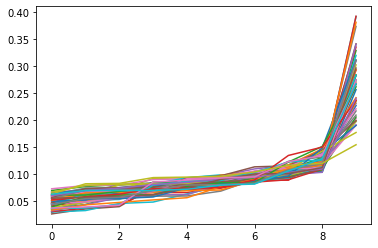

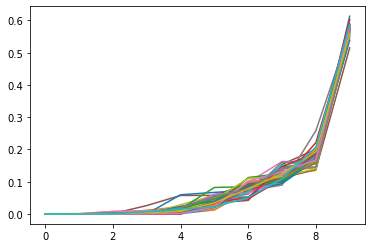

In [120]:
## Plot constrained softmax probabilities generated by the model

import matplotlib.pyplot as plt
ind = np.random.choice(len(preds['teacher']), 50)
plt.plot(np.sort(preds['teacher'])[ind].T)
plt.show()

ind = np.random.choice(len(preds['soft_teacher']), 50)
plt.plot(np.sort(preds['soft_teacher'])[ind].T)
plt.show()

In [116]:
from collections import Counter

pairs = [(x[-1], x[-2]) for x in np.argsort(preds['teacher'])]
counts = Counter(pairs)
counts.most_common(20)

[((4, 9), 4173),
 ((3, 5), 3223),
 ((7, 9), 3030),
 ((9, 4), 2460),
 ((5, 3), 2348),
 ((6, 5), 2334),
 ((1, 4), 2230),
 ((2, 3), 2195),
 ((0, 2), 2080),
 ((6, 4), 2067),
 ((1, 7), 1982),
 ((5, 9), 1881),
 ((0, 6), 1759),
 ((8, 5), 1475),
 ((9, 7), 1318),
 ((2, 8), 1316),
 ((1, 8), 1306),
 ((8, 9), 1202),
 ((8, 3), 1191),
 ((9, 8), 1178)]

In [ ]:
from collections import Counter

pairs = [(x[0], x[1]) for x in np.argsort(preds_st)]
counts = Counter(pairs)
counts.most_common(len(counts))

In [94]:
import tensorflow as tf
a = [[1, 10, 7, 9, 3, 66], [6, 4, 3, 2, 100, 0]]
b = tf.sort(a,axis=-1,direction='ASCENDING',name=None)
c = tf.keras.backend.eval(b)
c

array([[  1,   3,   7,   9,  10,  66],
       [  0,   2,   3,   4,   6, 100]], dtype=int32)